<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Moving-data-to-a-subset-classes" data-toc-modified-id="Moving-data-to-a-subset-classes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Moving data to a subset classes</a></span><ul class="toc-item"><li><span><a href="#Creating-a-single-dataframe-for-all-classes-of--AF3" data-toc-modified-id="Creating-a-single-dataframe-for-all-classes-of--AF3-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating a single dataframe for all classes of  AF3</a></span></li><li><span><a href="#Read-CSV-directly" data-toc-modified-id="Read-CSV-directly-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read CSV directly</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pre processing</a></span></li></ul></li><li><span><a href="#Models---test" data-toc-modified-id="Models---test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models - test</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Saving-plots" data-toc-modified-id="Saving-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Saving plots</a></span></li></ul></li><li><span><a href="#RUN-FROM-HERE" data-toc-modified-id="RUN-FROM-HERE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>RUN FROM HERE</a></span><ul class="toc-item"><li><span><a href="#Columnar-data" data-toc-modified-id="Columnar-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Columnar data</a></span></li></ul></li><li><span><a href="#New" data-toc-modified-id="New-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>New</a></span></li></ul></div>

In [1]:
import os
import shutil
import pandas as pd

# Moving data to a subset classes

- Zebra: n02391049
- Football: n04254680
- Strawberry: n07745940
- Ambulance: n02701002 
- Orange: n07747607
- Kite: n01608432
- Flamingo: n02007558
- Stethescope: n04317175
- Toaster: n04442312
- Mushroom: n07734744

In [2]:
path1 = 'data/MindBigData-Imagenet'
path2 = 'data/subset'

In [ ]:
def chckRename(x):
    dict_t = {"n02391049": "Zebra",
    "n04254680": "Football",
    "n07745940": "Strawberry",
    "n02701002": "Ambulance", 
    "n07747607": "Orange",
    "n01608432": "Kite",
    "n02007558": "Flamingo",
    "n04317175": "Stethescope",
    "n04442312": "Toaster",
    "n07734744": "Mushroom"}
    temp = ''
    for a in dict_t.keys():
        if x.find(a)!=-1:
            temp = dict_t[a]
            break
    if temp!='':
        return temp
    else:
        return 0
    
            

In [ ]:
chckRename("MindBigData_Imagenet_Insight_n01608432_10283_1_1653.csv")

In [ ]:
counter= 0
for a in os.listdir(path1):
    if chckRename(a)!=0:
        print(a)
        shutil.copy(f"{path1}/{a}", f"{path2}/{chckRename(a)}-{counter}.csv")
        counter+=1
#         break
    else:
        pass

## Creating a single dataframe for all classes of  AF3

In [ ]:
!dir "data/subset" 

In [ ]:
data = pd.DataFrame([])

In [ ]:
for a in os.listdir(path2):
    temp = pd.read_csv(f"{path2}/{a}",header = None)
    name = a.split('-')[0]
    temp = temp[temp[0]=='AF3']
    temp.insert(0, "0",name)
#     print(temp)
    data = data.append(temp)
#     break

In [ ]:
data.tail()

In [ ]:
data = data.fillna(0)

In [ ]:
data.to_csv("data/subset_csv.csv")

## Read CSV directly

In [1]:
import os
import shutil 
import pandas as pd

In [2]:
data = pd.read_csv("data/subset_csv.csv",header = 0)
data=data.drop(['Unnamed: 0'],axis =1)

In [3]:
data.head()

,0,0.1,1,2,3,4,5,6,7,8,...,403,404,405,406,407,408,409,410,411,412
0,Ambulance,AF3,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambulance,AF3,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambulance,AF3,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambulance,AF3,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ambulance,AF3,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.tail()

,0,0.1,1,2,3,4,5,6,7,8,...,403,404,405,406,407,408,409,410,411,412
233,Zebra,AF3,4274.871795,4282.564103,4271.794872,4253.333333,4260.512821,4275.897436,4258.461538,4245.641026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,Zebra,AF3,4325.641026,4295.384615,4289.743590,4315.897436,4337.948718,4326.153846,4287.692308,4275.897436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,Zebra,AF3,4265.641026,4283.076923,4281.025641,4273.846154,4292.307692,4302.564103,4286.666667,4260.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,Zebra,AF3,4293.333333,4301.538462,4284.615385,4278.461538,4296.410256,4299.487179,4283.589744,4276.923077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,Zebra,AF3,4276.923077,4274.358974,4286.153846,4289.230769,4278.461538,4275.897436,4281.025641,4285.128205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = data.drop('0.1',axis = 1)

## Pre processing

In [6]:
data = data.fillna(0);data.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,Ambulance,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,4291.282051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambulance,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,4244.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambulance,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,4202.564103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambulance,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,4288.717949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ambulance,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,4334.871795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = data[data.columns[:392]]

In [8]:
data['0']=data['0'].astype('category') 

In [9]:
data['0'] = data['0'].cat.codes

In [10]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
233,9,4274.871795,4282.564103,4271.794872,4253.333333,4260.512821,4275.897436,4258.461538,4245.641026,4262.051282,...,4305.128205,4274.871795,4281.025641,4305.128205,4298.974359,4277.948718,4274.871795,0.000000,0.000000,0.000000
234,9,4325.641026,4295.384615,4289.743590,4315.897436,4337.948718,4326.153846,4287.692308,4275.897436,4307.692308,...,4258.974359,4254.871795,4260.000000,4273.333333,4276.410256,4274.358974,4280.512821,4277.435897,4252.307692,4231.794872
235,9,4265.641026,4283.076923,4281.025641,4273.846154,4292.307692,4302.564103,4286.666667,4260.000000,4248.205128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
236,9,4293.333333,4301.538462,4284.615385,4278.461538,4296.410256,4299.487179,4283.589744,4276.923077,4287.179487,...,4195.897436,4190.769231,4193.333333,4195.384615,4197.435897,4187.179487,4187.179487,4208.717949,4208.205128,4182.564103
237,9,4276.923077,4274.358974,4286.153846,4289.230769,4278.461538,4275.897436,4281.025641,4285.128205,4293.846154,...,4266.666667,4269.743590,4259.487179,4269.743590,4285.128205,4265.641026,4262.564103,4292.820513,4294.358974,4265.641026


# Models - test

In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [12]:
splitRatio = 0.2
train , test = train_test_split(data,test_size = splitRatio,random_state = 123,shuffle=True)

In [13]:
train_X = train.drop('0',axis = 1)
train_y = train['0']
test_X = test.drop('0',axis = 1)
test_y = test['0']

In [14]:
classifier =  XGBClassifier(
 random_state=777,
    verbose_eval = True,
 )

In [15]:
classifier.fit(train_X,train_y.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=777,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose_eval=True, verbosity=1)

In [16]:
predictions = classifier.predict(test_X)
print ("\naccuracy_score :",accuracy_score(test_y,predictions))
print ("\nclassification report :\n",(classification_report(test_y,predictions)))


accuracy_score : 0.10416666666666667

classification report :
               precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.20      0.50      0.29         4
           5       0.33      0.17      0.22         6
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         5
           8       0.20      0.12      0.15         8
           9       0.00      0.00      0.00         2

    accuracy                           0.10        48
   macro avg       0.09      0.10      0.08        48
weighted avg       0.10      0.10      0.09        48



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=150, n_jobs=-1, criterion="entropy", random_state=1)

In [19]:
rf.fit(train_X,train_y.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [20]:
predictions = rf.predict(test_X)
print ("\naccuracy_score :",accuracy_score(test_y,predictions))
print ("\nclassification report :\n",(classification_report(test_y,predictions)))


accuracy_score : 0.125

classification report :
               precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.18      0.29      0.22         7
           4       0.15      0.50      0.24         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1
           7       0.20      0.20      0.20         5
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2

    accuracy                           0.12        48
   macro avg       0.09      0.12      0.09        48
weighted avg       0.09      0.12      0.10        48



/home/subhaditya/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plot

In [21]:
import matplotlib.pyplot as plt

In [22]:
data.iloc[0]

0         0.000000
1      4294.871795
2      4291.794872
3      4294.358974
4      4298.461538
          ...     
387       0.000000
388       0.000000
389       0.000000
390       0.000000
391       0.000000
Name: 0, Length: 392, dtype: float64

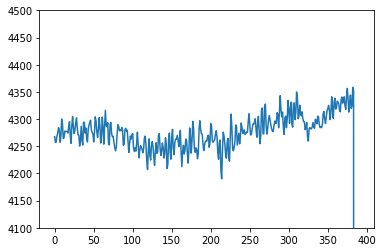

In [23]:
temp = data.iloc[200].tolist()
temp.pop(0);temp

plt.ylim(4100, 4500)
plt.plot(temp)


In [24]:
data.shape

(238, 392)

## Saving plots 

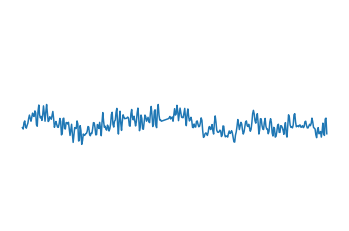

In [25]:
counter = 0
for a in range(238):
    temp =data.iloc[a].tolist()
    label = int(temp.pop(0))
#     temp.pop(0)
    plt.clf()
    plt.axis('off')
#     print(temp)
    plt.ylim(4100, 4500)
    plt.plot(temp)
    plt.savefig(f"data/subsetImage/{label}-{counter}.jpg")
    counter+=1

# RUN FROM HERE

In [26]:
from fastai.vision import *

In [27]:
path = Path('data/subsetImage')

In [40]:
path.ls()[1]

PosixPath('data/subsetImage/0-1.jpg')

In [41]:
def ret_name(x):return str(x).split('/')[-1][0]

In [42]:
ret_name(str("WindowsPath('data/subsetImage/0-0.jpg')"))

'0'

In [43]:
tfms =  get_transforms(do_flip = False, flip_vert=False, max_lighting=0.1, max_zoom=0., max_warp=0.)
data2 = (ImageList.from_folder(path) 
        .split_by_rand_pct(.2)              
        .label_from_func(ret_name)                          
        .transform(tfms, size=256)
        .databunch())          

In [44]:
data2.c

10

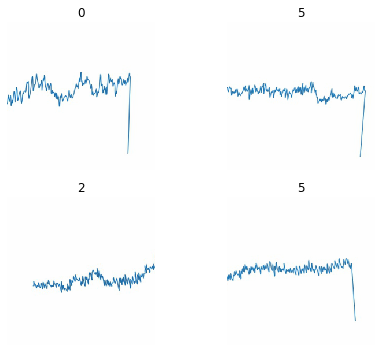

In [45]:
data2.show_batch(rows=2, figsize=(7,5))

In [51]:
learn = cnn_learner(data2, models.resnet18, metrics = accuracy, pretrained=False)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,3.784184,2.411465,0.085106,00:01


In [52]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,3.558251,3.093767,0.106383,00:01
1,3.633486,3.652983,0.085106,00:01
2,3.610986,3.284128,0.085106,00:01
3,3.483784,3.308280,0.127660,00:01
4,3.440270,3.735220,0.127660,00:01
5,3.381691,3.741609,0.106383,00:01
6,3.348581,3.794878,0.106383,00:01
7,3.320501,3.841355,0.085106,00:02
8,3.305133,3.906857,0.085106,00:01
9,3.269763,3.866488,0.085106,00:01


## Columnar data

In [55]:
from fastai.tabular import * 

In [56]:
data = pd.read_csv("data/subset_csv.csv",header = 0)
data=data.drop(['Unnamed: 0'],axis =1)

In [57]:
data = data.drop('0.1',axis = 1)

In [58]:
data = data.fillna(0);data.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,Ambulance,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,4291.282051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambulance,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,4244.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambulance,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,4202.564103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambulance,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,4288.717949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ambulance,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,4334.871795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
data = data[data.columns[:392]]

In [60]:
data['0']=data['0'].astype('category') 

In [61]:
data['0'] = data['0'].cat.codes

In [62]:
data['0']

0      0
1      0
2      0
3      0
4      0
      ..
233    9
234    9
235    9
236    9
237    9
Name: 0, Length: 238, dtype: int8

In [63]:
data['0']=data['0'].astype('category') 

In [64]:
cat_names = list('0123456789');cat_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Columns: 392 entries, 0 to 391
dtypes: category(1), float64(391)
memory usage: 727.8 KB


In [66]:
val_idx = range(210,238)

In [67]:
dep_var = '0'
path = 'data/subsetImage'

In [68]:
procs = [FillMissing, Categorify]

In [69]:
data

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,0,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,4291.282051,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,4244.102564,...,4311.794872,4322.051282,4296.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,4202.564103,...,4227.179487,4225.641026,4228.205128,4233.333333,4229.743590,4241.538462,4258.461538,4240.000000,4217.948718,4215.384615
3,0,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,4288.717949,...,4353.333333,4330.769231,4327.692308,4350.256410,4348.205128,4328.717949,4326.666667,4327.692308,4329.743590,4327.179487
4,0,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,4334.871795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,9,4274.871795,4282.564103,4271.794872,4253.333333,4260.512821,4275.897436,4258.461538,4245.641026,4262.051282,...,4305.128205,4274.871795,4281.025641,4305.128205,4298.974359,4277.948718,4274.871795,0.000000,0.000000,0.000000
234,9,4325.641026,4295.384615,4289.743590,4315.897436,4337.948718,4326.153846,4287.692308,4275.897436,4307.692308,...,4258.974359,4254.871795,4260.000000,4273.333333,4276.410256,4274.358974,4280.512821,4277.435897,4252.307692,4231.794872
235,9,4265.641026,4283.076923,4281.025641,4273.846154,4292.307692,4302.564103,4286.666667,4260.000000,4248.205128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
236,9,4293.333333,4301.538462,4284.615385,4278.461538,4296.410256,4299.487179,4283.589744,4276.923077,4287.179487,...,4195.897436,4190.769231,4193.333333,4195.384615,4197.435897,4187.179487,4187.179487,4208.717949,4208.205128,4182.564103


In [103]:
cont_names = data.columns.tolist()[1::];cont_names

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [104]:
procs = [FillMissing, Categorify,Normalize]
dep_var = '0'
data2 = (TabularList.from_df(data, path=path, cat_names=['0'], cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(200,230)))
                        .label_from_df(cols = dep_var)
                         .add_test(TabularList.from_df(data, path=path, cat_names=['0'], cont_names=cont_names))
                        .databunch())

In [131]:
data2.show_batch(10,ds_type=DatasetType.Test)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,target
0,0.2539,0.2167,0.2480,0.3188,0.1899,-0.0968,-0.1219,0.1496,0.1916,-0.2037,-0.4066,-0.1784,0.2063,0.2516,-0.0561,-0.1926,-0.0951,-0.0672,-0.0349,-0.0789,-0.1203,0.0651,0.3446,0.3175,0.1314,-0.0620,-0.1322,-0.0851,-0.0850,-0.0887,-0.0492,-0.0362,-0.0278,-0.1640,-0.2364,-0.0791,-0.0051,0.0038,0.0214,-0.1870,-0.2994,-0.0961,0.0325,0.0116,-0.0300,0.0237,0.0463,-0.0947,-0.1356,0.0953,0.0484,-0.3474,-0.3870,-0.1442,-0.1094,-0.0956,-0.0266,-0.2553,-0.4391,-0.1433,0.0206,-0.0894,0.1733,0.2394,-0.2129,-0.2562,-0.1008,-0.1407,-0.1066,-0.0806,-0.1090,-0.1282,-0.4377,-0.6324,-0.1699,0.1007,-0.3198,-0.6251,-0.4809,-0.4010,-0.3905,-0.1524,-0.0543,-0.3316,-0.4953,-0.3491,-0.1651,-0.0587,-0.1443,-0.1719,-0.0681,-0.1414,-0.2573,-0.3421,-0.4699,-0.4512,-0.3634,-0.4916,-0.5380,-0.4177,-0.4807,-0.5836,-0.5273,-0.4877,-0.5665,-0.6707,-0.5020,-0.3454,-0.4567,-0.5453,-0.4248,-0.3689,-0.4832,-0.5853,-0.5998,-0.4808,-0.2645,-0.2486,-0.3466,-0.3763,-0.3631,-0.4510,-0.5075,-0.4247,-0.3097,-0.2830,-0.2019,-0.0702,0.0026,0.0132,-0.0601,-0.1357,-0.1875,-0.1870,0.0669,0.2652,-0.0750,-0.2836,0.1865,0.4205,0.0584,-0.1766,-0.0995,-0.0968,-0.1040,-0.1464,-0.2357,-0.1946,-0.1563,-0.2742,-0.3081,-0.1967,-0.3024,-0.3772,-0.0306,0.4941,0.7097,0.3891,0.0209,0.2176,0.6457,0.5569,0.2506,0.2546,0.3763,0.3409,0.2560,0.2202,0.1847,0.0737,0.1081,0.1689,-0.0260,-0.2264,-0.1643,-0.0956,-0.2278,-0.2500,-0.1069,-0.0857,-0.2886,-0.2202,0.1305,0.2293,0.0759,0.0702,0.1929,0.0382,-0.1684,0.0406,0.2856,0.1733,-0.0180,0.1470,0.2849,0.0310,-0.3288,-0.3949,-0.2344,-0.1210,0.0001,0.1472,0.2249,0.1719,0.2240,0.3193,0.0867,-0.2012,-0.2938,-0.2085,-0.1854,-0.2680,-0.1213,0.0890,-0.0719,-0.2659,-0.1710,-0.0577,0.0337,0.0946,0.1211,0.1782,-0.0462,-0.2543,0.0205,0.1136,-0.1560,-0.1367,-0.0827,-0.4086,-0.4803,-0.2983,-0.3391,-0.4902,-0.7046,-0.9965,-1.0141,-0.8607,-0.9101,-0.7592,-0.4551,-0.4912,-0.5926,-0.5900,-0.6737,-0.5878,-0.2993,-0.3127,-0.6610,-0.6502,-0.4488,-0.4753,-0.2795,-0.0530,-0.6729,-1.1106,-0.3680,0.0727,-0.2572,-0.3976,-0.4383,-0.6162,-0.7020,-0.6474,-0.5483,-0.6709,-0.9807,-0.7573,-0.3840,-0.5647,-0.7752,-0.5642,-0.4714,-0.4220,-0.1214,0.0062,-0.2256,-0.3433,-0.2423,-0.3950,-0.4197,-0.1078,-0.0862,-0.2202,-0.2237,-0.2850,-0.1591,0.0987,-0.0980,-0.4136,-0.1753,0.0382,-0.3221,-0.2932,0.0589,-0.0521,-0.1087,0.1482,-0.0347,-0.5710,-0.7342,-0.5337,-0.2718,-0.2077,-0.3786,-0.3879,-0.1989,-0.0200,-0.0382,-0.0915,-0.0155,0.1031,0.1423,0.0616,0.0099,0.0630,0.0339,-0.0999,0.0805,0.4225,0.4374,0.1470,-0.0722,-0.0618,0.0019,-0.0315,0.0216,0.2915,0.4

In [132]:
learn = tabular_learner(data2, layers=[1000, 200, 15], metrics=accuracy, emb_drop=0.1, callback_fns=ShowGraph)


In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


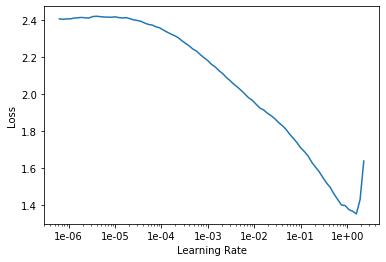

In [92]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.415881,2.201049,0.066667,03:35


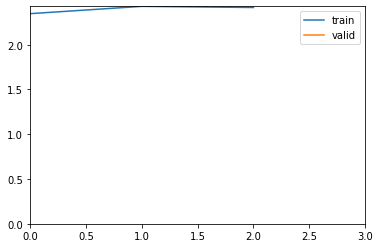

In [133]:
learn.fit_one_cycle(1, max_lr=slice(1e-04))

In [134]:
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,2.280203,2.193240,0.333333,04:08
1,2.231153,2.190010,0.500000,01:48


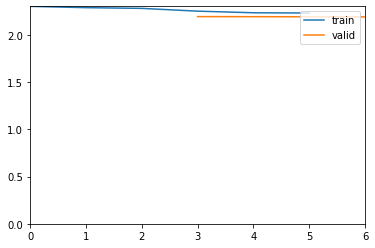

In [135]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-04))

In [136]:
learn.save('stage-2')

In [139]:
learn.get_preds(ds_type=DatasetType.Test)

[tensor([[0.0924, 0.0855, 0.1227,  ..., 0.0927, 0.1240, 0.0757],
         [0.0865, 0.0829, 0.1229,  ..., 0.0959, 0.1266, 0.0779],
         [0.0919, 0.0897, 0.1343,  ..., 0.0931, 0.1246, 0.0736],
         ...,
         [0.0856, 0.0862, 0.1193,  ..., 0.0898, 0.1295, 0.0801],
         [0.0884, 0.0773, 0.1167,  ..., 0.0897, 0.1356, 0.0760],
         [0.0895, 0.0790, 0.1199,  ..., 0.0908, 0.1249, 0.0789]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 

In [140]:
data.iloc[2]

0            0
1      4209.23
2      4217.44
3      4197.44
4         4180
        ...   
387    4241.54
388    4258.46
389       4240
390    4217.95
391    4215.38
Name: 2, Length: 392, dtype: object

In [141]:
learn.predict(data.iloc[2])

(Category 2,
 tensor(2),
 tensor([0.0919, 0.0897, 0.1343, 0.1064, 0.0776, 0.1201, 0.0886, 0.0931, 0.1246,
         0.0736]))

# New

In [1]:
from fastai.tabular import * 

In [13]:
dep_var = '0'
path = 'data/subsetImage'

In [71]:
data = pd.read_csv("data/subset_csv.csv",header = 0)
data=data.drop(['Unnamed: 0'],axis =1)

In [72]:
data = data.drop('0.1',axis = 1)

In [73]:
data = data.fillna(0);data.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,Ambulance,4294.871795,4291.794872,4294.358974,4298.461538,4292.820513,4278.974359,4276.410256,4288.205128,4291.282051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambulance,4272.307692,4274.871795,4266.153846,4262.051282,4254.358974,4251.282051,4264.102564,4250.769231,4244.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambulance,4209.230769,4217.435897,4197.435897,4180.000000,4194.871795,4205.641026,4197.435897,4201.025641,4202.564103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambulance,4287.692308,4294.358974,4312.820513,4309.743590,4288.717949,4295.384615,4313.846154,4301.538462,4288.717949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ambulance,4324.102564,4311.794872,4287.692308,4289.230769,4304.615385,4295.897436,4290.769231,4322.564103,4334.871795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
data = data[data.columns[:392]]

In [75]:
data['0']=data['0'].astype('category') 

In [77]:
data['0'] = data['0'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [78]:
data['0']

0      0
1      0
2      0
3      0
4      0
      ..
233    9
234    9
235    9
236    9
237    9
Name: 0, Length: 238, dtype: int8

In [79]:
data['0']=data['0'].astype('category') 

In [80]:
cont_names = data.columns.tolist()[1::]

In [81]:
data_wi = data.drop('0',axis=1)

In [82]:
procs = [FillMissing, Categorify,Normalize]
dep_var = '0'
data2 = (TabularList.from_df(data, path=path, cat_names=['0'], cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(200,230)))
                        .label_from_df(cols = dep_var)
                         .add_test(TabularList.from_df(data, path=path, cat_names=['0'], cont_names=cont_names))
                        .databunch())

In [83]:
data2.show_batch(10,ds_type=DatasetType.Test)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,target
0,0.2539,0.2167,0.2480,0.3188,0.1899,-0.0968,-0.1219,0.1496,0.1916,-0.2037,-0.4066,-0.1784,0.2063,0.2516,-0.0561,-0.1926,-0.0951,-0.0672,-0.0349,-0.0789,-0.1203,0.0651,0.3446,0.3175,0.1314,-0.0620,-0.1322,-0.0851,-0.0850,-0.0887,-0.0492,-0.0362,-0.0278,-0.1640,-0.2364,-0.0791,-0.0051,0.0038,0.0214,-0.1870,-0.2994,-0.0961,0.0325,0.0116,-0.0300,0.0237,0.0463,-0.0947,-0.1356,0.0953,0.0484,-0.3474,-0.3870,-0.1442,-0.1094,-0.0956,-0.0266,-0.2553,-0.4391,-0.1433,0.0206,-0.0894,0.1733,0.2394,-0.2129,-0.2562,-0.1008,-0.1407,-0.1066,-0.0806,-0.1090,-0.1282,-0.4377,-0.6324,-0.1699,0.1007,-0.3198,-0.6251,-0.4809,-0.4010,-0.3905,-0.1524,-0.0543,-0.3316,-0.4953,-0.3491,-0.1651,-0.0587,-0.1443,-0.1719,-0.0681,-0.1414,-0.2573,-0.3421,-0.4699,-0.4512,-0.3634,-0.4916,-0.5380,-0.4177,-0.4807,-0.5836,-0.5273,-0.4877,-0.5665,-0.6707,-0.5020,-0.3454,-0.4567,-0.5453,-0.4248,-0.3689,-0.4832,-0.5853,-0.5998,-0.4808,-0.2645,-0.2486,-0.3466,-0.3763,-0.3631,-0.4510,-0.5075,-0.4247,-0.3097,-0.2830,-0.2019,-0.0702,0.0026,0.0132,-0.0601,-0.1357,-0.1875,-0.1870,0.0669,0.2652,-0.0750,-0.2836,0.1865,0.4205,0.0584,-0.1766,-0.0995,-0.0968,-0.1040,-0.1464,-0.2357,-0.1946,-0.1563,-0.2742,-0.3081,-0.1967,-0.3024,-0.3772,-0.0306,0.4941,0.7097,0.3891,0.0209,0.2176,0.6457,0.5569,0.2506,0.2546,0.3763,0.3409,0.2560,0.2202,0.1847,0.0737,0.1081,0.1689,-0.0260,-0.2264,-0.1643,-0.0956,-0.2278,-0.2500,-0.1069,-0.0857,-0.2886,-0.2202,0.1305,0.2293,0.0759,0.0702,0.1929,0.0382,-0.1684,0.0406,0.2856,0.1733,-0.0180,0.1470,0.2849,0.0310,-0.3288,-0.3949,-0.2344,-0.1210,0.0001,0.1472,0.2249,0.1719,0.2240,0.3193,0.0867,-0.2012,-0.2938,-0.2085,-0.1854,-0.2680,-0.1213,0.0890,-0.0719,-0.2659,-0.1710,-0.0577,0.0337,0.0946,0.1211,0.1782,-0.0462,-0.2543,0.0205,0.1136,-0.1560,-0.1367,-0.0827,-0.4086,-0.4803,-0.2983,-0.3391,-0.4902,-0.7046,-0.9965,-1.0141,-0.8607,-0.9101,-0.7592,-0.4551,-0.4912,-0.5926,-0.5900,-0.6737,-0.5878,-0.2993,-0.3127,-0.6610,-0.6502,-0.4488,-0.4753,-0.2795,-0.0530,-0.6729,-1.1106,-0.3680,0.0727,-0.2572,-0.3976,-0.4383,-0.6162,-0.7020,-0.6474,-0.5483,-0.6709,-0.9807,-0.7573,-0.3840,-0.5647,-0.7752,-0.5642,-0.4714,-0.4220,-0.1214,0.0062,-0.2256,-0.3433,-0.2423,-0.3950,-0.4197,-0.1078,-0.0862,-0.2202,-0.2237,-0.2850,-0.1591,0.0987,-0.0980,-0.4136,-0.1753,0.0382,-0.3221,-0.2932,0.0589,-0.0521,-0.1087,0.1482,-0.0347,-0.5710,-0.7342,-0.5337,-0.2718,-0.2077,-0.3786,-0.3879,-0.1989,-0.0200,-0.0382,-0.0915,-0.0155,0.1031,0.1423,0.0616,0.0099,0.0630,0.0339,-0.0999,0.0805,0.4225,0.4374,0.1470,-0.0722,-0.0618,0.0019,-0.0315,0.0216,0.2915,0.4

In [84]:
torch.cuda.set_device(0)

In [87]:
learn = tabular_learner(data2, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04,metrics=accuracy, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


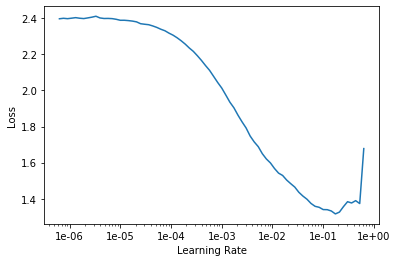

In [66]:
with torch.cuda.device(0):
    learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
